<a href="https://colab.research.google.com/github/shourjya19b/Probability-Mass-Estimation/blob/main/PMF_Estimation_Football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from scipy.stats import poisson
from scipy.stats import chisquare
from scipy.stats import chi2

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [ ]:
data=pd.read_excel('/content/Premier League Goal Data.xlsx')

In [ ]:
data.head(10)

,Home Team,Away Team,Home Goals,Away Goals,Total Goals
0,Fulham,Arsenal,0,3,3
1,Crystal Palace,Southampton,1,0,1
2,Liverpool,Leeds,4,3,7
3,West Ham,Newcastle,0,2,2
4,West Brom,Leicester,0,3,3
5,Tottenham,Everton,0,1,1
6,Brighton,Chelsea,1,3,4
7,Sheffield United,Wolves,0,2,2
8,Everton,West Brom,5,2,7
9,Leeds,Fulham,4,3,7


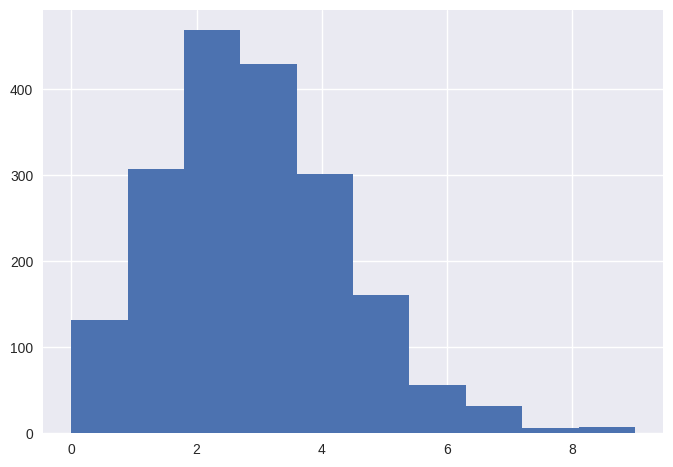

In [ ]:
plt.hist(data['Total Goals'])
plt.show()

In [ ]:
goals_df=pd.DataFrame()

goals_df['freq']=data.groupby('Total Goals')['Total Goals'].count()

In [ ]:
goals_df

,freq
Total Goals,
0,132
1,307
2,469
3,429
4,301
5,161
6,56
7,32
8,6


In [ ]:
goals_df['emp_prob']=goals_df['freq']/(goals_df['freq'].sum())

In [ ]:
goals_df['Poisson pmf']=poisson.pmf(k=goals_df.index,mu=data['Total Goals'].mean())

In [ ]:
goals_df['Poisson pmf']=goals_df['Poisson pmf']+(1-goals_df['Poisson pmf'].sum())/10

In [ ]:
goals_df

,freq,emp_prob,Poisson pmf
Total Goals,,,
0,132,0.069474,0.064423
1,307,0.161579,0.176625
2,469,0.246842,0.242234
3,429,0.225789,0.221500
4,301,0.158421,0.151920
5,161,0.084737,0.083374
6,56,0.029474,0.038149
7,32,0.016842,0.014984
8,6,0.003158,0.005175


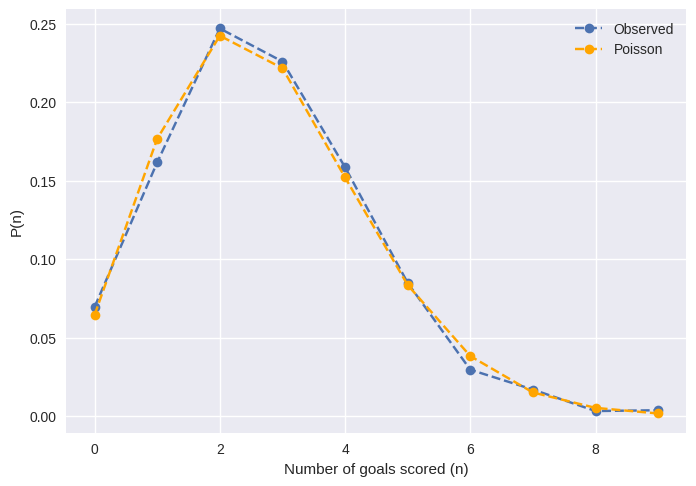

In [ ]:
plt.plot(goals_df.index,goals_df['emp_prob'],'o--',label='Observed')
plt.plot(goals_df.index,goals_df['Poisson pmf'],'o--',color='orange',label='Poisson')
plt.xlabel('Number of goals scored (n)')
plt.ylabel('P(n)')
plt.legend()
plt.show()

# ***Bootstrap Confidence Intervals***
***Fitting Poisson Distribution to the data and estimating parameters***:

Assuming each data point to be *iid Poisson($\lambda$)*,


***Maximum Likelihood Estimate:***

$$\hat{\lambda}_{ML} = Sample Mean$$

***Bootstrap*** :

Generating Bootstrap samples using  $\hat\lambda_{ML} = 2.74$ to get estimates $\hat\lambda_{MLB}(i), i=1,2,3....N$ and hence,

***Generating Error Density Function*** :  $$Error = \hat\lambda_{MLB}  - \hat\lambda_{ML}$$

***Calculating Bias*** : $$Bias = E[\hat\lambda_{MLB}] - \hat\lambda_{ML}$$

$$E[\hat\lambda_{MLB}]= \frac{\sum^N_{i=1}\hat\lambda_{MLB}(i)}{N}$$


***Calculating Variance*** :
$$Var[{\hat\lambda_{MLB}}] = E [{\hat\lambda_{MLB}}^2] - (E[{\hat\lambda_{MLB}}])^2$$

In [ ]:
(lamda,bstrap)=(data['Total Goals'].mean(),[])

#Bootstrap

for i in range(10000):
  rand_samples=np.array(poisson.rvs(lamda,size=1900))
  bstrap.append(np.average(rand_samples))

In [ ]:
#Bias

bias=np.average(np.array(bstrap))-lamda
print('Bias of MLE using Bootstrap =',bias)

Bias of MLE using Bootstrap = -0.0002271052631579451


In [ ]:
#Variance

variance=np.var(np.array(bstrap))
print('Variance of MLE using Bootstrap =',variance)

Variance of MLE using Bootstrap = 0.001431762799930748


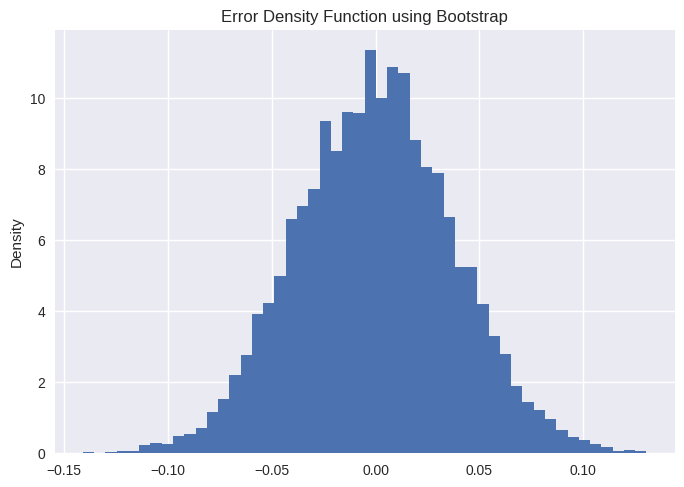

In [ ]:
#Plotting Error Density

plt.title('Error Density Function using Bootstrap')
plt.hist(bstrap-lamda,bins=50,density=True)
plt.ylabel('Density')
plt.show()

***Bootstrap Confidence Intervals*** :

To obtain $(100(1-\alpha))$% confidence intervals,
we consider the list of numbers $\{\hat{\lambda}_{MM/ML}(1)-2.74315...,\ldots,\hat{\lambda}_{MM/ML}(N)-2.74315...\}$ and pick the $100(\alpha/2)$-th percentile and $100(1-\alpha/2)$-th percentile.

The 95% confidence interval for $\lambda$ = $[2.74315-(limit1),2.74315-(limit2)]$.

In [ ]:
#Constructing Confidence Intervals

low=lamda-np.percentile(bstrap-lamda,97.5)
up=lamda-np.percentile(bstrap-lamda,2.5)
print('[limit1,limit2] =',[lamda-low,lamda-up])
print('Confidence Interval (95%) =',[low,up])

[limit1,limit2] = [0.07473684210526343, -0.07263157894736816]
Confidence Interval (95%) = [2.6684210526315786, 2.81578947368421]


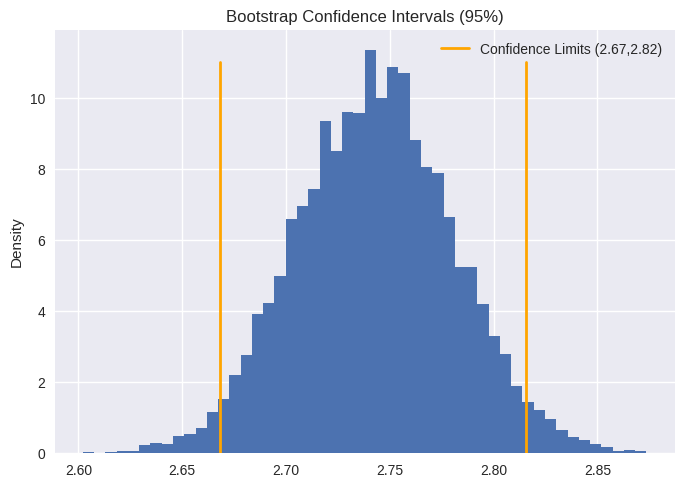

In [ ]:
#Plotting Density function with confidence limits

plt.hist(bstrap,bins=50,density=True)

x1=[low]*100
y1=np.linspace(0,11,100)
plt.plot(x1,y1,'-',linewidth=2,color='orange')

x2=[up]*100
y2=np.linspace(0,11,100)
plt.plot(x2,y2,'-',linewidth=2,color='orange',label='Confidence Limits (2.67,2.82)')

plt.ylabel('Density')
plt.title('Bootstrap Confidence Intervals (95%)')
plt.legend()
plt.show()

In [ ]:
goals_df['exp_freq']=np.round_(goals_df['Poisson pmf']*(goals_df['freq'].sum()),4)

In [ ]:
goals_df

,freq,emp_prob,Poisson pmf,exp_freq
Total Goals,,,,
0,132,0.069474,0.064423,122.4043
1,307,0.161579,0.176625,335.5870
2,469,0.246842,0.242234,460.2441
3,429,0.225789,0.221500,420.8500
4,301,0.158421,0.151920,288.6482
5,161,0.084737,0.083374,158.4100
6,56,0.029474,0.038149,72.4823
7,32,0.016842,0.014984,28.4697
8,6,0.003158,0.005175,9.8327


In [ ]:
goals_df['Poisson pmf'].sum(),goals_df['exp_freq'].sum()

(1.0, 1899.9999999999998)

In [ ]:
#ChiSquare Test

print(chisquare(list(goals_df['freq']),list(goals_df['exp_freq'])))

Power_divergenceResult(statistic=14.786265706807447, pvalue=0.09697669358469892)
